In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,precision_score
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings("ignore")

age = Horse age
saddle = where horse starts
isFav = Was horse favorite before start?
decimalPrice = 1/Decimal price [How much return can get if bet wins, for each unit of stake which includes original stake as well. ]
position = Finishing position (40 if horse didn't finish)
positionL = How far a horse has finished from the pursued horse
dist = How far a horse has finished from a winner
weightSt = Horse weight in St
weightLb = Horse weight in Lb
overWeight = Overweight code
outHandicap = Handicap
RPR = RP Rating [Racing Post Rating, which is a performance rating system created by the Racing Post, a popular British racing publication. The RP      Rating assesses the performance of a horse in a race and assigns a numerical value to it, allowing comparisons between horses.]
TR = Topspeed
OR = Official Rating
margin = Sum of decimal prices for the race
weight = Horse weight in kg
res_win = Horse won or not
res_place = Horse placed or not

In [247]:
df_1 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\horse data\horses_2016.csv")
df_1.head(3)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,TR,OR,father,mother,gfather,runners,margin,weight,res_win,res_place
0,32857,Village Vic,9.00,7.00,0.22,1,Philip Hobbs,Richard Johnson,1,NaN,...,127.00,144.00,Old Vic,Etoile Margot,Garde Royale,11,1.18,68,1.00,1
1,32857,Tenor Nivernais,9.00,5.00,0.15,0,Venetia Williams,Aidan Coleman,2,3,...,125.00,145.00,Shaanmer,Hosanna II,Marasali,11,1.18,68,0.00,1
2,32857,Top Gamble,8.00,3.00,0.11,0,Kerry Lee,Jamie Moore,3,.75,...,132.00,153.00,Presenting,Zeferina,Sadler's Wells,11,1.18,72,0.00,1


In [248]:
df_2 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\horse data\horses_2017.csv")
df_2.head(3)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,TR,OR,father,mother,gfather,runners,margin,weight,res_win,res_place
0,29789,Wish In A Well,8.00,5.00,0.17,0,Ben Case,Max Kendrick,1,NaN,...,36.00,71.00,Gamut,Lady Bellingham,Montelimar,5,1.12,61,1.00,1
1,29789,Troufion,8.00,2.00,0.27,0,Caroline Bailey,Miss Gina Andrews,2,20,...,36.00,92.00,Smadoun,La Troussardiere,Maresca Sorrento,5,1.12,73,0.00,1
2,29789,Arctic Ben,13.00,1.00,0.31,1,Henry Daly,Hugh Nugent,3,15,...,24.00,97.00,Beneficial,Hurst Flyer,Neltino,5,1.12,72,0.00,0


In [249]:
df_3 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\horse data\horses_2018.csv")
df_3.head(3)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,TR,OR,father,mother,gfather,runners,margin,weight,res_win,res_place
0,16767,Material Man,6.00,2.00,0.28,1,Justin Warwick,Lucy Warwick,1,NaN,...,NaN,NaN,Vital Equine,Del Lirio,Hussonet,16,1.15,56,1.00,1
1,16767,Pounamu,6.00,1.00,0.21,0,Alan Mathews,Patrick Carbery,2,nse,...,NaN,NaN,Authorized,Tangiwai,Street Cry,16,1.15,58,0.00,1
2,16767,Royal Star,4.00,13.00,0.07,0,Grant &amp; Alana Williams,Clint Johnston-Porter,3,2.25,...,NaN,NaN,Redoute's Choice,Star Encounter,Jeune,16,1.15,53,0.00,1


In [250]:
df_4 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\horse data\horses_2019.csv")
df_4.head(3)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,TR,OR,father,mother,gfather,runners,margin,weight,res_win,res_place
0,11499,Picken,4.00,6.00,0.31,0,J Size,Joao Moreira,1,NaN,...,NaN,54.00,Duporth,Baby Boom,Redoute's Choice,13,1.22,56,1.00,1
1,11499,Noble De Love,6.00,7.00,0.33,1,F C Lor,Zac Purton,2,nk,...,NaN,53.00,Commands,Terrenora,Encosta De Lago,13,1.22,56,0.00,1
2,11499,Fresh Power,5.00,3.00,0.20,0,Y S Tsui,Silvestre De Sousa,3,2.5,...,NaN,56.00,Makfi,Bannisters,Redoute's Choice,13,1.22,57,0.00,1


In [251]:
df_5 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\horse data\horses_2020.csv")
df_5.head(3)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,10312,Waterproof,4.00,9.00,0.08,0,Shaun Keightley,Brendan Powell,1,NaN,...,NaN,Pour Moi,Laughing Water,Duke Of Marmalade,9,1.20,66,1.00,1.00,NaN
1,10312,Eva's Diva,6.00,7.00,0.44,1,Phil Middleton,Mr Sam Lee,2,15,...,110.00,Getaway,Shouette,Sadler's Wells,9,1.20,65,0.00,1.00,NaN
2,10312,Incredible Dream,7.00,5.00,0.02,0,Conrad Allen,Joshua Moore,3,5.5,...,NaN,Vale Of York,Finnmark,Halling,9,1.20,72,0.00,1.00,NaN


In [252]:
df_horse = pd.concat([df_1,df_2,df_3,df_4,df_5],ignore_index=True)
df_horse.head(3)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,32857,Village Vic,9.00,7.00,0.22,1,Philip Hobbs,Richard Johnson,1,NaN,...,144.00,Old Vic,Etoile Margot,Garde Royale,11,1.18,68,1.00,1.00,NaN
1,32857,Tenor Nivernais,9.00,5.00,0.15,0,Venetia Williams,Aidan Coleman,2,3,...,145.00,Shaanmer,Hosanna II,Marasali,11,1.18,68,0.00,1.00,NaN
2,32857,Top Gamble,8.00,3.00,0.11,0,Kerry Lee,Jamie Moore,3,.75,...,153.00,Presenting,Zeferina,Sadler's Wells,11,1.18,72,0.00,1.00,NaN


In [253]:
df_1 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\race data\races_2016.csv")
df_1.head(3)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class
0,32857,Cheltenham,01:55,16/01/01,BetBright Best For Festival Betting Handicap C...,Class 1,NaN,5yo+,2m5f,Heavy,15 fences 2 omitted,"[34170.0, 12822.0, 6420.0, 3198.0, 1608.0, 804.0]",331.50,59022.00,4223.00,GB,9,1
1,4182,Exeter,01:10,16/01/01,Bathwick Tyres Bridgwater Maiden Hurdle,Class 5,NaN,4yo+,2m1f,Heavy,7 hurdles 1 omitted,"[2599.2, 763.2, 381.6, 190.8]",285.20,3935.00,3419.00,GB,9,5
2,8029,Meydan (UAE),12:35,16/01/01,EGA Al Taweelah Trophy (Handicap) (Dirt),NaN,64-84,3yo+,6f,Fast,NaN,"[14972.27, 4990.76, 2744.92, 1497.23, 748.61]",72.12,24954.00,1206.00,AE,7,0


In [254]:
df_2 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\race data\races_2017.csv")
df_2.head(3)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class
0,29789,Fakenham,03:35,17/01/01,Fakenham Amateur Riders' Handicap Chase,Class 5,0-100,5yo+,2m5f,Soft,16 fences,"[4367.3, 1354.5, 676.9, 338.8]",357.20,6737.00,4223.00,GB,5,5
1,36082,Exeter,01:50,17/01/01,Billy Williams Memorial Maiden Hurdle,Class 4,NaN,4yo+,2m1f,Soft,8 hurdles,"[3249.0, 954.0, 477.0, 238.5]",262.40,4918.00,3419.00,GB,5,4
2,5960,Fakenham,01:20,17/01/01,Independent Racecourses Ltd. Novices' Handicap...,Class 5,0-100,5yo+,2m5f,Soft,16 fences,"[4659.9, 1446.9, 779.1]",354.40,6886.00,4223.00,GB,5,5


In [255]:
df_3 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\race data\races_2018.csv")
df_3.head(3)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class
0,16767,Ascot (AUS),09:05,18/01/01,Tabtouch-Perth Cup (Group 2 Handicap) (3yo+) (...,NaN,NaN,3yo+,1m4f,Good,NaN,"[187283.24, 57803.47, 26011.56, 11560.69, 5780...",148.50,302889.00,2413.00,AU,1,0
1,17141,Exeter,04:05,18/01/01,Devon County Show Maiden Open National Hunt Fl...,Class 5,NaN,4-6yo,2m1f,Heavy,NaN,"[2274.3, 667.8, 333.9, 166.95]",296.10,3443.00,3419.00,GB,9,5
2,19370,Sha Tin (HK),05:30,18/01/01,Wong Leng Handicap (Class 4) (3yo+) (Course B+...,NaN,NaN,3yo+,7f,Good,NaN,"[47455.06, 18315.99, 9574.27, 4995.27, 2913.91]",82.79,83254.00,1407.00,HK,1,0


In [256]:
df_4 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\race data\races_2019.csv")
df_4.head(3)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class
0,11499,Sha Tin (HK),06:30,19/01/01,Wong Leng Handicap (Class 4) (3yo+) (Course C)...,NaN,NaN,3yo+,7f,Good,NaN,"[52492.49, 20260.26, 10590.59, 5525.53, 3223.22]",82.46,92092.00,1407.00,HK,1,0
1,26954,Sha Tin (HK),05:00,19/01/01,Kowloon Peak Handicap (Class 5) (3yo+) (Course...,NaN,NaN,3yo+,1m,Good,NaN,"[39369.37, 15195.2, 7942.94, 4144.14, 2417.42]",95.75,69068.00,1609.00,HK,1,0
2,35478,Fairyhouse (IRE),02:40,19/01/01,Follow Fairyhouse On Social Media Beginners Chase,NaN,NaN,5yo+,2m5f,Good,13 fences,"[8624.0, 2674.0, 1274.0, 574.0]",341.30,13146.00,4223.00,IE,1,0


In [257]:
df_5 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\race data\races_2020.csv")
df_5.head(3)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,Good To Soft,9 hurdles,"[5198.4, 1526.4, 763.2, 381.6]",253.88,7869,3218.00,GB,10,4,NaN
1,10896,Cheltenham,03:50,20/01/01,EBF Stallions &amp; Cheltenham Pony Club (A St...,Class 1,NaN,4yo,1m6f,Soft,NaN,"[14237.5, 5342.5, 2675.0, 1332.5, 670.0, 335.0]",206.55,24592,2815.00,GB,5,1,NaN
2,23038,Tramore (IRE),02:55,20/01/01,Jerry O'Donovan Memorial Rated Novice Chase,NaN,NaN,5yo+,2m,Soft,12 fences,"[7387.5, 2387.5, 1137.5, 512.5, 262.5, 137.5]",266.40,11826,3218.00,IE,5,0,NaN


In [258]:
df_race = pd.concat([df_1,df_2,df_3,df_4,df_5],ignore_index=True)
df_race.head(2)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,32857,Cheltenham,01:55,16/01/01,BetBright Best For Festival Betting Handicap C...,Class 1,NaN,5yo+,2m5f,Heavy,15 fences 2 omitted,"[34170.0, 12822.0, 6420.0, 3198.0, 1608.0, 804.0]",331.50,59022.00,4223.00,GB,9,1,NaN
1,4182,Exeter,01:10,16/01/01,Bathwick Tyres Bridgwater Maiden Hurdle,Class 5,NaN,4yo+,2m1f,Heavy,7 hurdles 1 omitted,"[2599.2, 763.2, 381.6, 190.8]",285.20,3935.00,3419.00,GB,9,5,NaN


In [259]:
df = pd.concat([df_horse,df_race],ignore_index=True)
df.head(2)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,32857,Village Vic,9.00,7.00,0.22,1.00,Philip Hobbs,Richard Johnson,1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32857,Tenor Nivernais,9.00,5.00,0.15,0.00,Venetia Williams,Aidan Coleman,2.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
df.size

41389972

In [262]:
print(f"rows : {df.shape[0]}")

rows : 899782


In [263]:
print(f"columns:{df.shape[1]}")

columns:46


In [264]:
df.duplicated().sum()

0

In [265]:
df.head(2)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,32857,Village Vic,9.00,7.00,0.22,1.00,Philip Hobbs,Richard Johnson,1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32857,Tenor Nivernais,9.00,5.00,0.15,0.00,Venetia Williams,Aidan Coleman,2.00,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Key features to prioritize are decimalPrice, isFav, position/positionL, age, distance, weight variables, ratings (RPR, TR, OR), margin, and res_win/res_place.

In [266]:
cols = ['rid','horseName','saddle','trainerName','jockeyName','weightSt','weightLb','overWeight','outHandicap','headGear','father','mother','gfather',
        'runners','price','course','time','date','title','rclass','band','ages','condition','hurdles','prizes','winningTime','prize','metric','countryCode',
        'ncond','class','currency']

In [267]:
df.drop(columns=cols,inplace=True)

In [268]:
df.columns

Index(['age', 'decimalPrice', 'isFav', 'position', 'positionL', 'dist', 'RPR',
       'TR', 'OR', 'margin', 'weight', 'res_win', 'res_place', 'distance'],
      dtype='object')

In [269]:
df.head(3)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,res_place,distance
0,9.00,0.22,1.00,1.00,NaN,NaN,161.00,127.00,144.00,1.18,68.00,1.00,1.00,NaN
1,9.00,0.15,0.00,2.00,3,NaN,157.00,125.00,145.00,1.18,68.00,0.00,1.00,NaN
2,8.00,0.11,0.00,3.00,.75,3.75,164.00,132.00,153.00,1.18,72.00,0.00,1.00,NaN


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899782 entries, 0 to 899781
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   age           816750 non-null  float64
 1   decimalPrice  816750 non-null  float64
 2   isFav         816750 non-null  float64
 3   position      816750 non-null  float64
 4   positionL     694274 non-null  object 
 5   dist          611508 non-null  object 
 6   RPR           677449 non-null  float64
 7   TR            474686 non-null  float64
 8   OR            475771 non-null  float64
 9   margin        816750 non-null  float64
 10  weight        816750 non-null  float64
 11  res_win       816750 non-null  float64
 12  res_place     816750 non-null  float64
 13  distance      83032 non-null   object 
dtypes: float64(11), object(3)
memory usage: 96.1+ MB


In [271]:
df.isna().sum()

age              83032
decimalPrice     83032
isFav            83032
position         83032
positionL       205508
dist            288274
RPR             222333
TR              425096
OR              424011
margin           83032
weight           83032
res_win          83032
res_place        83032
distance        816750
dtype: int64

## Descriptive Statistics ##

In [272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,816750.00,4.87,2.19,1.00,3.00,4.00,6.00,27.00
decimalPrice,816750.00,0.12,0.12,0.00,0.04,0.08,0.17,0.99
isFav,816750.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00
position,816750.00,7.57,8.24,1.00,3.00,6.00,9.00,40.00
RPR,677449.00,74.94,28.74,1.00,55.00,74.00,95.00,183.00
TR,474686.00,49.56,27.47,1.00,29.00,47.00,66.00,177.00
OR,475771.00,82.47,25.87,1.00,63.00,79.00,100.00,177.00
margin,816750.00,1.21,0.08,1.00,1.16,1.20,1.23,3.02
weight,816750.00,60.67,6.61,43.00,56.00,58.00,67.00,105.00
res_win,816750.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00


## Data Cleaning & Pre-processing: ##

In [273]:
num_cols = df.select_dtypes(include='number')

In [274]:
num_cols

,age,decimalPrice,isFav,position,RPR,TR,OR,margin,weight,res_win,res_place
0,9.00,0.22,1.00,1.00,161.00,127.00,144.00,1.18,68.00,1.00,1.00
1,9.00,0.15,0.00,2.00,157.00,125.00,145.00,1.18,68.00,0.00,1.00
2,8.00,0.11,0.00,3.00,164.00,132.00,153.00,1.18,72.00,0.00,1.00
3,9.00,0.03,0.00,4.00,136.00,103.00,144.00,1.18,64.00,0.00,0.00
4,9.00,0.07,0.00,5.00,147.00,113.00,154.00,1.18,72.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
899777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
for col in num_cols:
    df[col] = df[col].replace('Nan',np.nan)
    df[col] = df[col].fillna(0)

In [276]:
df.isna().sum()

age                  0
decimalPrice         0
isFav                0
position             0
positionL       205508
dist            288274
RPR                  0
TR                   0
OR                   0
margin               0
weight               0
res_win              0
res_place            0
distance        816750
dtype: int64

In [277]:
cat_cols = df.select_dtypes(include='object')

In [278]:
cat_cols

,positionL,dist,distance
0,NaN,NaN,NaN
1,3,NaN,NaN
2,.75,3.75,NaN
3,19,22.75,NaN
4,.5,23.25,NaN
...,...,...,...
899777,NaN,NaN,1m2f
899778,NaN,NaN,1m½f
899779,NaN,NaN,2m2f
899780,NaN,NaN,1m


In [279]:
for col in cat_cols:
    df[col] = df[col].replace('Nan',np.nan)
    df[col] = df[col].fillna(0)

In [280]:
df.head()

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,res_place,distance
0,9.00,0.22,1.00,1.00,0,0,161.00,127.00,144.00,1.18,68.00,1.00,1.00,0
1,9.00,0.15,0.00,2.00,3,0,157.00,125.00,145.00,1.18,68.00,0.00,1.00,0
2,8.00,0.11,0.00,3.00,.75,3.75,164.00,132.00,153.00,1.18,72.00,0.00,1.00,0
3,9.00,0.03,0.00,4.00,19,22.75,136.00,103.00,144.00,1.18,64.00,0.00,0.00,0
4,9.00,0.07,0.00,5.00,.5,23.25,147.00,113.00,154.00,1.18,72.00,0.00,0.00,0


In [281]:
def convert_distance(distance):
    distance = str(distance)
    fractions = {'½': 0.5, '¼': 0.25, '¾': 0.75}
    miles,furlong = 0,''
    if 'm' in distance:
        miles_part,furlong_part = distance.split('m')
        miles = int(miles_part)*8
        furlong = furlong_part.replace('f', '')

    elif 'f' in distance:
        furlong = distance.replace('f', '')

    for frac,value in fractions.items():
        furlong = furlong.replace(frac,str(value))
    
    return miles+float(furlong) if furlong else miles   
    

In [282]:
df['distance'] = df['distance'].apply(lambda x: convert_distance(x))

In [284]:
df['distance'].unique()

array([ 0. , 21. , 17. ,  6. , 24. ,  5. , 16. , 25. ,  8. , 12. , 20. ,
       36.5, 19. , 34.5, 56.5, 11. , 46.5, 23. , 44.5, 26. ,  7. , 78.5,
       66.5, 14. , 86.5, 70.5,  8.5, 10. , 58.5, 60.5, 16.5, 24.5,  9. ,
       18.5, 48.5, 13. , 28.5, 18. , 74.5, 22. , 30. , 15. , 29. , 76.5,
       68.5, 50.5, 28. , 26.5, 27. , 64.5,  4. , 84.5, 32.5, 32. , 42.5,
       40.5, 38.5, 52.5, 33. , 54.5, 34. , 94.5, 31. ])

In [285]:
df['positionL'] = df['positionL'].astype(str)

In [286]:
df['positionL'] = df['positionL'].str.replace(r"[a-zA-z]"," ",regex=True)

In [287]:
df['positionL'] = df['positionL'].str.strip()

In [288]:
df = df[df['positionL']!=""]

In [289]:
df['positionL'].unique()

array(['0', '3', '.75', '19', '.5', '1.75', '3.25', '2.5', '6', '8', '32',
       '5', '22', '31', '3.5', '49', '4.5', '1.25', '1.5', '16.5', '3.75',
       '1', '9', '53', '2', '4', '39', '13', '16', '20', '6.5', '10',
       '28', '5.5', '46', '7', '4.25', '4.75', '2.75', '9.5', '29', '78',
       '83', '14', '2.25', '36', '11', '5.25', '18', '15', '10.75',
       '7.25', '34', '12', '71', '8.75', '7.5', '8.5', '26', '43', '89',
       '51', '8.25', '13.5', '12.5', '30', '25', '24', '37', '21', '9.75',
       '5.75', '15.5', '17', '33', '23', '27', '35', '99', '38', '59',
       '10.5', '6.25', '47', '11.75', '45', '9.25', '11.5', '50', '67',
       '54', '62', '61', '42', '56', '80', '63', '48', '79', '75', '6.75',
       '41', '40', '58', '64', '44', '74', '82', '69', '7.75', '92', '98',
       '65', '60', '57', '73', '68', '77', '19.5', '10.25', '81', '76',
       '66', '70', '55', '90', '22.5', '88', '87', '94', '85', '52',
       '13.25', '103', '18.25', '.25', '93', '91', '95',

In [290]:
df['dist'] = df['dist'].astype(str)

In [291]:
df['dist'] = df['dist'].str.replace(r"[a-zA-Z]","",regex=True)

In [292]:
df['dist'] = df['dist'].str.strip()

In [293]:
df['dist'] = df['dist'].str.replace("","0",regex=False)

In [294]:
df = df[df['dist']!=""]

In [295]:
df['dist'].unique()

array(['000', '030.07050', '02020.07050', ..., '0202030.02050',
       '0109020.07050', '0200080.050'], dtype=object)

In [296]:
cat_cols

,positionL,dist,distance
0,NaN,NaN,NaN
1,3,NaN,NaN
2,.75,3.75,NaN
3,19,22.75,NaN
4,.5,23.25,NaN
...,...,...,...
899777,NaN,NaN,1m2f
899778,NaN,NaN,1m½f
899779,NaN,NaN,2m2f
899780,NaN,NaN,1m


In [297]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,res_place,distance
0,9.00,0.22,1.00,1.00,0,000,161.00,127.00,144.00,1.18,68.00,1.00,1.00,0.00
1,9.00,0.15,0.00,2.00,3,000,157.00,125.00,145.00,1.18,68.00,0.00,1.00,0.00


## Feature Engineering: ##

####  New column 'target' is created to have a results of both columns res_win & res_place in a single column.res_win tells whether the result is win or loss,meanwhile res_place tells that either the horse is placed or not.This creation of target column simplifies the prediction task by combining the two possible outcomes into a single class.hence class 0 represents the negative result, it tells that the horse is neither won or nor placed and class 1 represents vice versa to the class 0 that is the horse is either won or placed. ####

In [298]:
df['target'] = (df['res_win'] == 1) | (df['res_place'] == 1)
df['target'] = df['target'].astype(int)


In [299]:
df.head()

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,res_place,distance,target
0,9.00,0.22,1.00,1.00,0,000,161.00,127.00,144.00,1.18,68.00,1.00,1.00,0.00,1
1,9.00,0.15,0.00,2.00,3,000,157.00,125.00,145.00,1.18,68.00,0.00,1.00,0.00,1
2,8.00,0.11,0.00,3.00,.75,030.07050,164.00,132.00,153.00,1.18,72.00,0.00,1.00,0.00,1
3,9.00,0.03,0.00,4.00,19,02020.07050,136.00,103.00,144.00,1.18,64.00,0.00,0.00,0.00,0
4,9.00,0.07,0.00,5.00,.5,02030.02050,147.00,113.00,154.00,1.18,72.00,0.00,0.00,0.00,0


## Data type conversion: ##

In [300]:
df.dtypes

age             float64
decimalPrice    float64
isFav           float64
position        float64
positionL        object
dist             object
RPR             float64
TR              float64
OR              float64
margin          float64
weight          float64
res_win         float64
res_place       float64
distance        float64
target            int32
dtype: object

In [301]:
df['dist'] = pd.to_numeric(df['dist'],errors='coerce')
df['positionL'] = pd.to_numeric(df['positionL'],errors='coerce')

In [302]:
df['age'] = df['age'].astype(int)
df['isFav'] = df['isFav'].astype(int)
df['position'] = df['position'].astype(int)
df['res_win'] = df['res_win'].astype(int)
df['res_place'] = df['res_place'].astype(int)

In [303]:
df['positionL'] = df['positionL'].astype(int)

In [304]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,res_place,distance,target
0,9,0.22,1,1,0,0.00,161.00,127.00,144.00,1.18,68.00,1,1,0.00,1
1,9,0.15,0,2,3,0.00,157.00,125.00,145.00,1.18,68.00,0,1,0.00,1


In [305]:
df.dtypes

age               int32
decimalPrice    float64
isFav             int32
position          int32
positionL         int32
dist            float64
RPR             float64
TR              float64
OR              float64
margin          float64
weight          float64
res_win           int32
res_place         int32
distance        float64
target            int32
dtype: object

## Unique values of each column: ##

In [306]:
for col in df.columns:
    print(f"{col}:{df[col].unique()}")

age:[ 9  8  5  7  6  4 10 11 12 13  3 14 15  2 16 18 19  1 17 27  0]
decimalPrice:[0.22222222 0.15384615 0.11111111 0.02941176 0.06666667 0.13333333
 0.14285714 0.05882353 0.6        0.07692308 0.1        0.01960784
 0.01492537 0.11764706 0.16666667 0.05263158 0.01234568 0.04761905
 0.00662252 0.4        0.28571429 0.26666667 0.09090909 0.18181818
 0.04347826 0.34782609 0.33333333 0.125      0.23076923 0.44444444
 0.03846154 0.08333333 0.25       0.36363636 0.83333333 0.52380952
 0.03448276 0.8        0.2        0.26315789 0.07633588 0.03030303
 0.02040816 0.04807692 0.11235955 0.66666667 0.30769231 0.02439024
 0.00990099 0.10526316 0.55555556 0.77777778 0.42105263 0.37037037
 0.05       0.00497512 0.41666667 0.22727273 0.01408451 0.10869565
 0.01724138 0.00584795 0.00746269 0.45454545 0.47619048 0.64516129
 0.11494253 0.04273504 0.02222222 0.06849315 0.01149425 0.05347594
 0.43478261 0.23809524 0.3125     0.08264463 0.03333333 0.01587302
 0.52631579 0.04587156 0.06993007 0.01754386 0.

In [307]:
df.isna().sum()

age             0
decimalPrice    0
isFav           0
position        0
positionL       0
dist            0
RPR             0
TR              0
OR              0
margin          0
weight          0
res_win         0
res_place       0
distance        0
target          0
dtype: int64

In [308]:
df.columns

Index(['age', 'decimalPrice', 'isFav', 'position', 'positionL', 'dist', 'RPR',
       'TR', 'OR', 'margin', 'weight', 'res_win', 'res_place', 'distance',
       'target'],
      dtype='object')

In [309]:
df['distance'].size

762091

In [310]:
df.size

11431365

In [311]:
df =df.head(100000)

In [312]:
df['distance'].unique()

array([0.])

In [313]:
df = df.drop(['distance'],axis=1)

In [314]:
df.head()

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,res_place,target
0,9,0.22,1,1,0,0.00,161.00,127.00,144.00,1.18,68.00,1,1,1
1,9,0.15,0,2,3,0.00,157.00,125.00,145.00,1.18,68.00,0,1,1
2,8,0.11,0,3,0,30.07,164.00,132.00,153.00,1.18,72.00,0,1,1
3,9,0.03,0,4,19,2020.07,136.00,103.00,144.00,1.18,64.00,0,0,0
4,9,0.07,0,5,0,2030.02,147.00,113.00,154.00,1.18,72.00,0,0,0


In [315]:
len(df.columns)

14

In [316]:
plott_cols = df.drop(columns='target').columns
plott_cols

Index(['age', 'decimalPrice', 'isFav', 'position', 'positionL', 'dist', 'RPR',
       'TR', 'OR', 'margin', 'weight', 'res_win', 'res_place'],
      dtype='object')

In [317]:
sns.set(style="whitegrid")

## Relationship of each Independent variable with target variable: ##

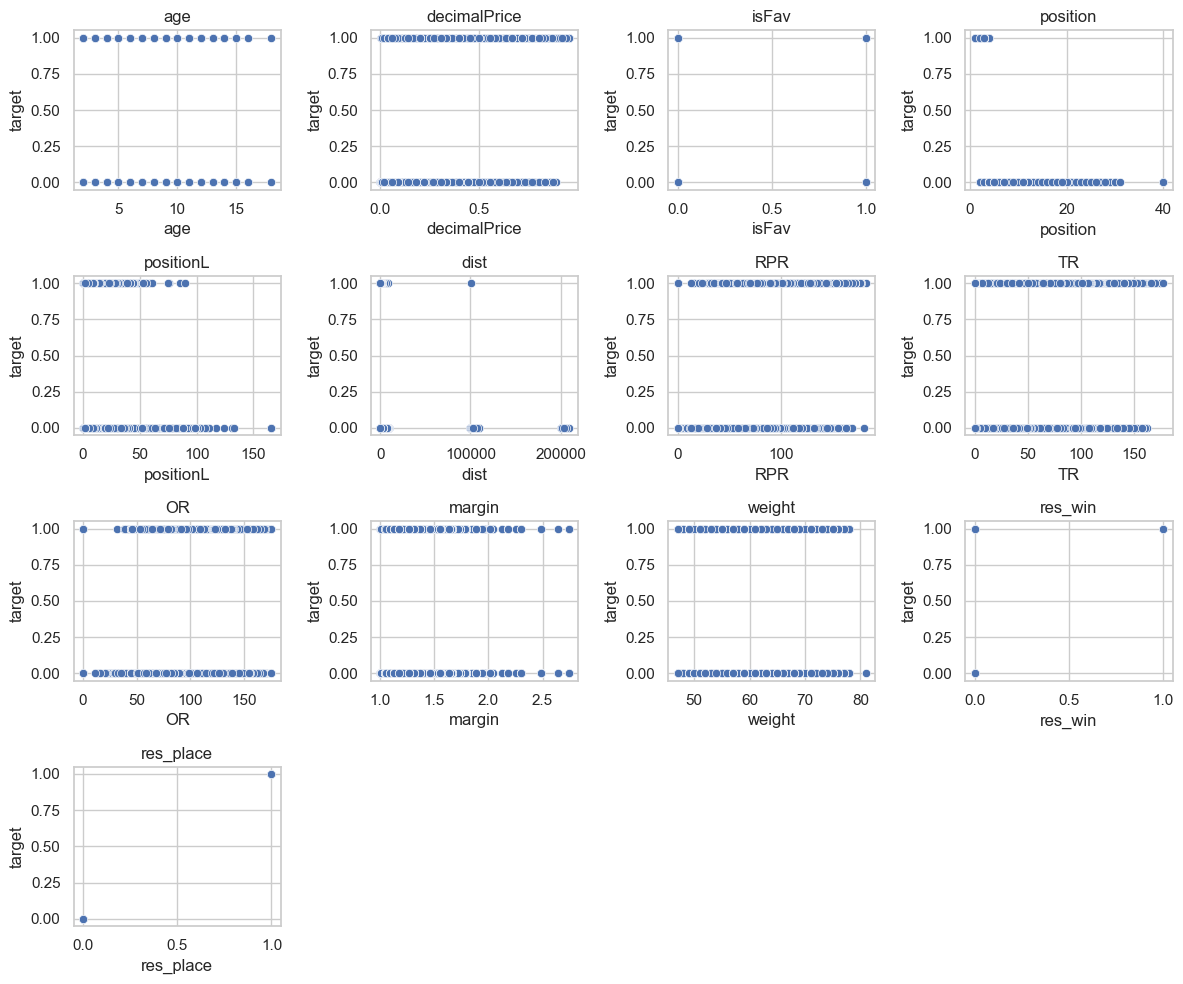

In [318]:
plt.figure(figsize=(12,10))
for i,col in enumerate(plott_cols,1):
    plt.subplot(4,4,i)
    sns.scatterplot(x =df[col],y = df['target'])
    plt.title(col)
plt.tight_layout()
plt.show()


## Correlation heatmap ##

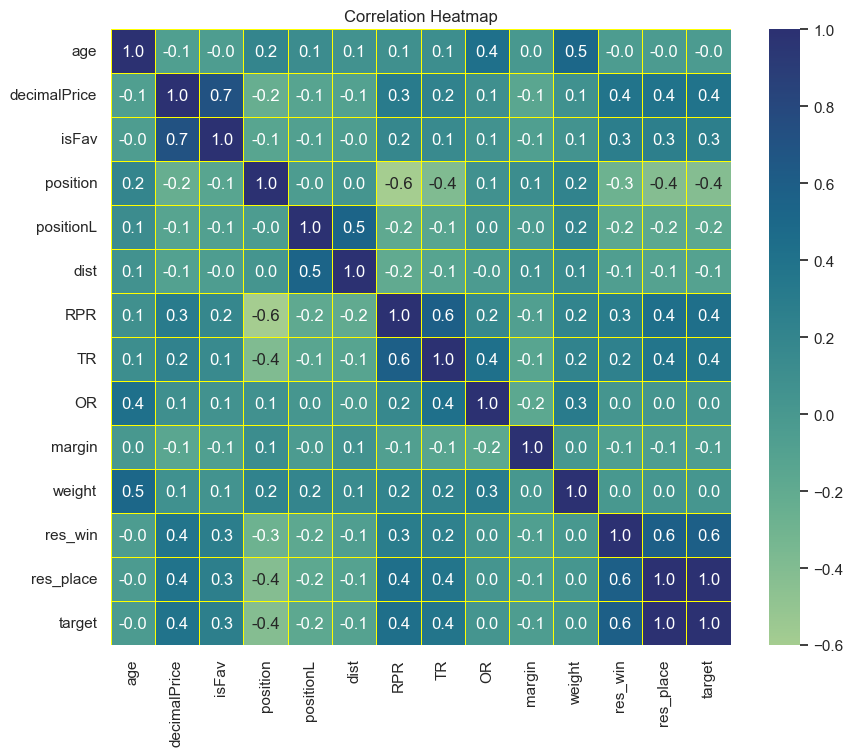

In [319]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="crest",fmt=".1f",linewidth=.5,linecolor="yellow")
plt.title('Correlation Heatmap')
plt.show()

### Since res_place shares high correlation with the target feature,it should be removed to avoid multicollinearity."Multicollinearity in simple terms is conveying the same information to the model". ###

In [320]:
df = df.drop(['res_place'],axis=1)

In [321]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,target
0,9,0.22,1,1,0,0.00,161.00,127.00,144.00,1.18,68.00,1,1
1,9,0.15,0,2,3,0.00,157.00,125.00,145.00,1.18,68.00,0,1


In [322]:
df.columns

Index(['age', 'decimalPrice', 'isFav', 'position', 'positionL', 'dist', 'RPR',
       'TR', 'OR', 'margin', 'weight', 'res_win', 'target'],
      dtype='object')

In [323]:
plott_cols = df.drop(columns='target').columns
plott_cols

Index(['age', 'decimalPrice', 'isFav', 'position', 'positionL', 'dist', 'RPR',
       'TR', 'OR', 'margin', 'weight', 'res_win'],
      dtype='object')

## Data Distribution ##

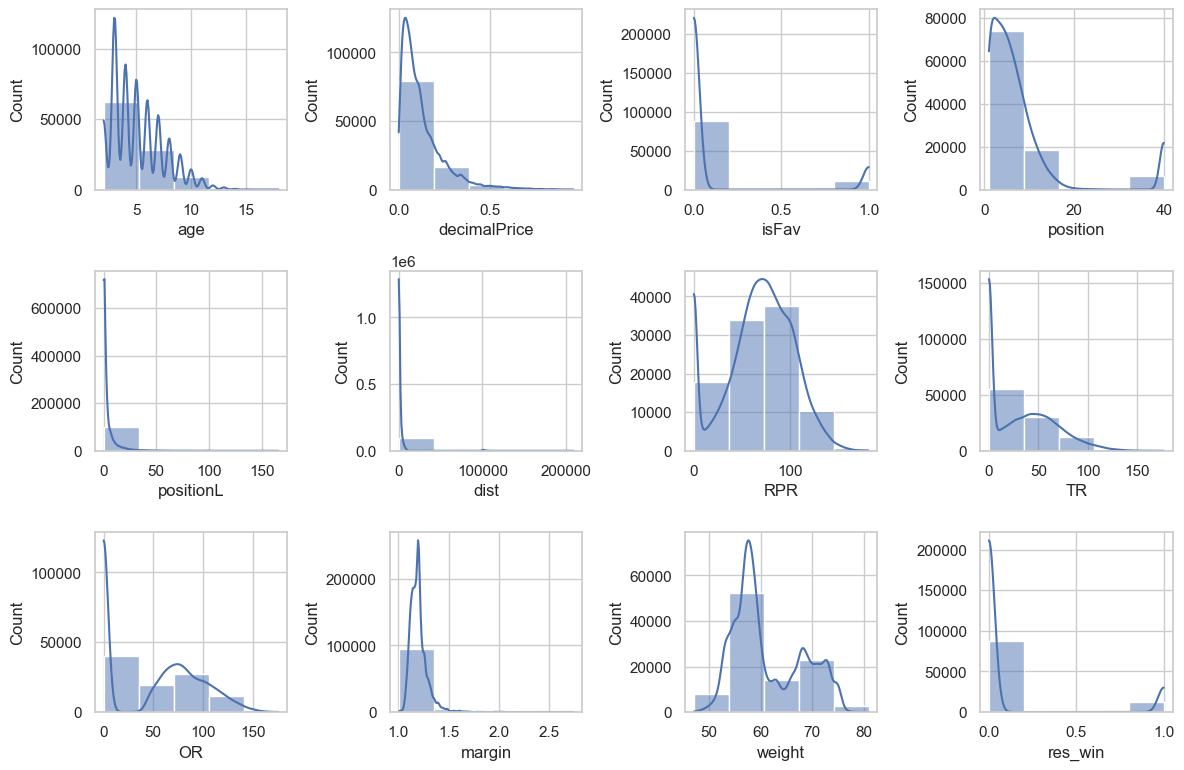

In [324]:
plt.figure(figsize=(12,10))
for i,col in enumerate(plott_cols,1):
    plt.subplot(4,4,i)
    sns.histplot(data=df,x=df[col],bins=5,kde=True)
plt.tight_layout()
plt.show()

In [325]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,target
0,9,0.22,1,1,0,0.00,161.00,127.00,144.00,1.18,68.00,1,1
1,9,0.15,0,2,3,0.00,157.00,125.00,145.00,1.18,68.00,0,1


## Skewed columns: ##

In [326]:
skew_cols = ['decimalPrice','position','positionL','dist','RPR','TR']
skew_cols

['decimalPrice', 'position', 'positionL', 'dist', 'RPR', 'TR']

In [327]:
for col in skew_cols:
    df[col] = df[col].apply(lambda x:np.log(x+1))

In [328]:
for col in skew_cols:
    print(f"{col} : {(skew(df[col]))}")

decimalPrice : 1.6751507522471043
position : 0.5591058763043915
positionL : 0.9233719658075276
dist : -0.04251131696366456
RPR : -2.2262525582161703
TR : -0.42851897415682383


## After Log transformation: ##

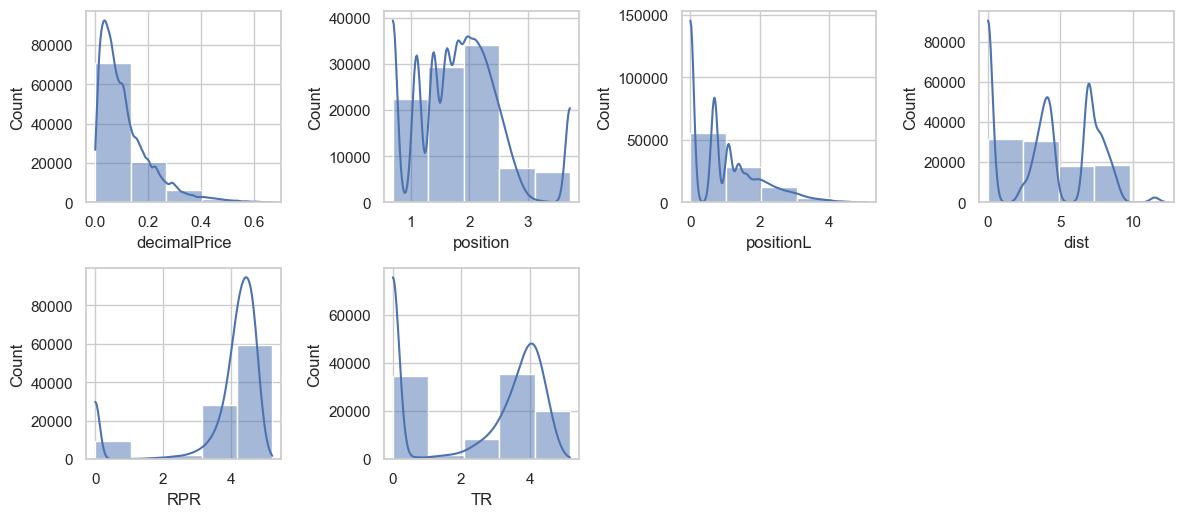

In [329]:
plt.figure(figsize=(12,10))
for i,col in enumerate(skew_cols,1):
    plt.subplot(4,4,i)
    sns.histplot(data=df,x=df[col],bins=5,kde=True)
plt.tight_layout()
plt.show()

## Outliers Removal ##

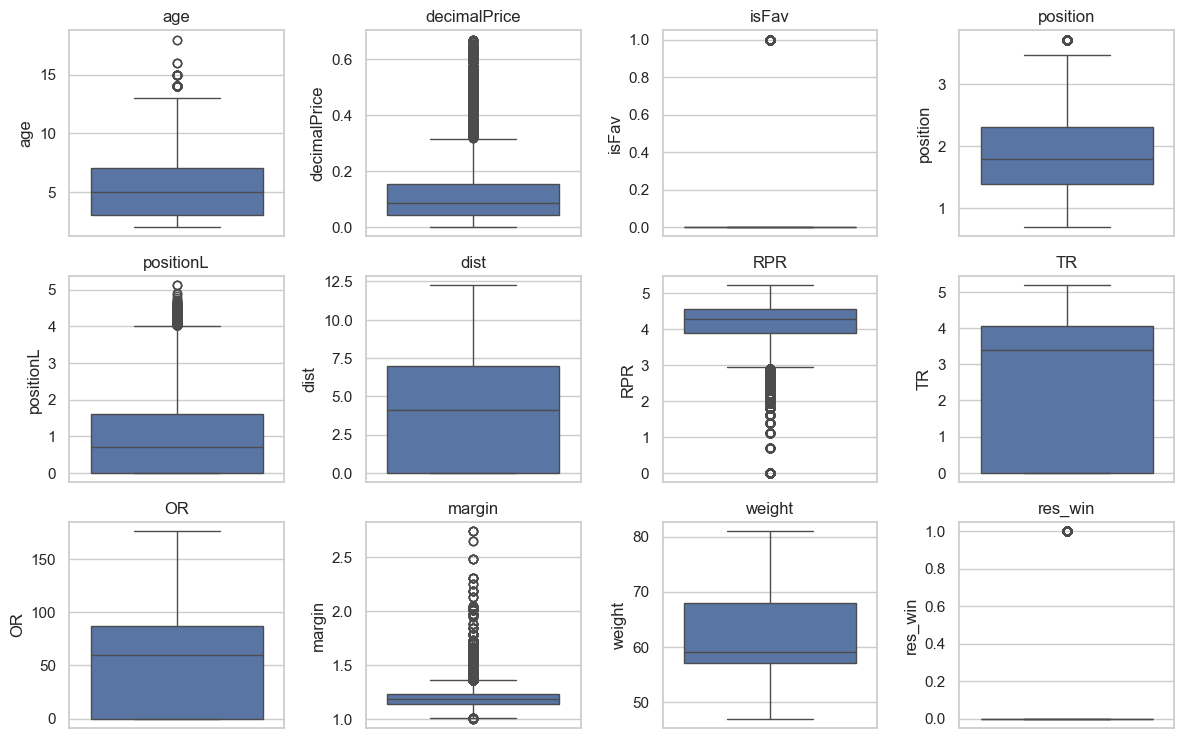

In [330]:
plt.figure(figsize=(12,10))
for i,col in enumerate(plott_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Age column: ##

In [331]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
print(f"Q1:{q1:.2f},Q3:{q3:.2f},IQR:{iqr:.2f}")

Q1:3.00,Q3:7.00,IQR:4.00


In [332]:
lf = q1-1.5*iqr
uf = q3+1.5*iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:-3.00,Upper_fence:13.00


In [333]:
df = df[(df['age']>lf) & (df['age']<uf)]

In [335]:
df = df[df['age']<9]

In [336]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,target
2,8,0.11,0,1.39,0.00,3.44,5.11,4.89,153.00,1.18,72.00,0,1
6,5,0.13,0,2.08,0.69,7.63,4.88,4.58,145.00,1.18,66.00,0,0


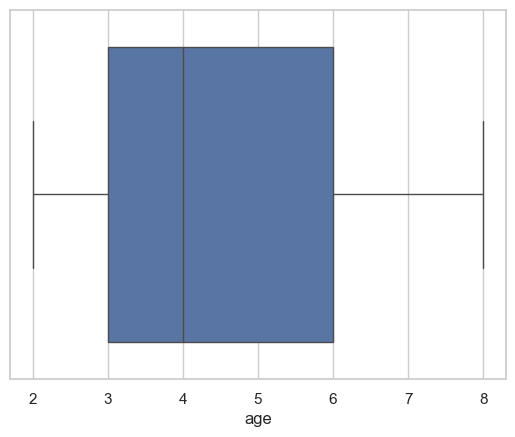

In [337]:
sns.boxplot(data=df,x=df['age'])
plt.show()

## Decimal price ##

In [338]:
q1 = df['decimalPrice'].quantile(0.25)
q3 = df['decimalPrice'].quantile(0.75)
iqr = q3 - q1
print(f"Q1:{q1:.2f},Q3:{q3:.2f},IQR:{iqr:.2f}")

Q1:0.04,Q3:0.15,IQR:0.11


In [339]:
lf = q1-1.5*iqr
uf = q3+1.5*iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:-0.12,Upper_fence:0.32


In [340]:
df = df[(df['decimalPrice']>lf) & (df['decimalPrice']<uf)]

In [341]:
df = df[df['decimalPrice']<0.25]

In [342]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,target
2,8,0.11,0,1.39,0.00,3.44,5.11,4.89,153.00,1.18,72.00,0,1
6,5,0.13,0,2.08,0.69,7.63,4.88,4.58,145.00,1.18,66.00,0,0


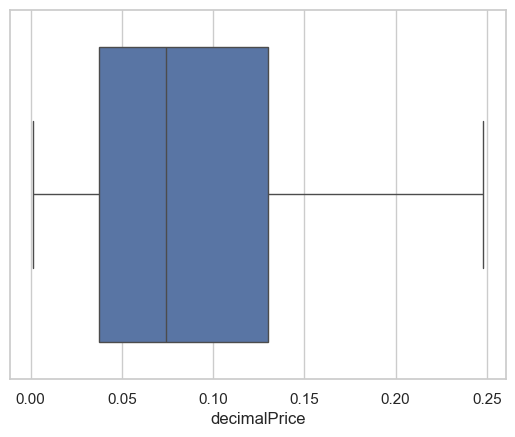

In [343]:
sns.boxplot(data=df,x=df['decimalPrice'])
plt.show()

## Position ##

In [344]:
q1 = df['position'].quantile(0.25)
q3 = df['position'].quantile(0.75)
iqr = q3 - q1
print(f"Q1:{q1:.2f},Q3:{q3:.2f},IQR:{iqr:.2f}")

Q1:1.39,Q3:2.30,IQR:0.92


In [345]:
lf = q1-1.5*iqr
uf = q3+1.5*iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:0.01,Upper_fence:3.68


In [346]:
df = df[(df['position']>lf) & (df['position']<uf)]

In [347]:
df = df[df['position']<3.4]

In [348]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,target
2,8,0.11,0,1.39,0.00,3.44,5.11,4.89,153.00,1.18,72.00,0,1
6,5,0.13,0,2.08,0.69,7.63,4.88,4.58,145.00,1.18,66.00,0,0


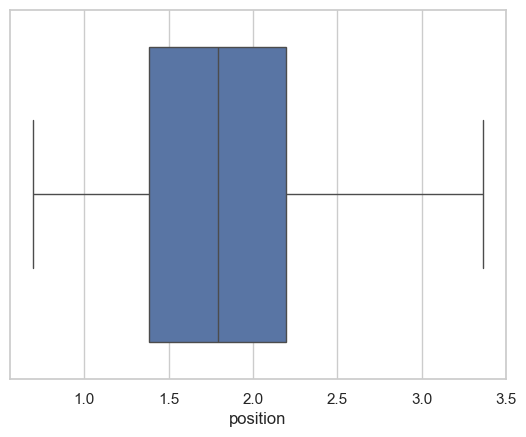

In [349]:
sns.boxplot(data=df,x=df['position'])
plt.show()

## PositionL column ##

In [350]:
q1 = df['positionL'].quantile(0.25)
q3 = df['positionL'].quantile(0.75)
iqr = q3 - q1
print(f"Q1;{q1:.2f},Q3:{q3:.2f},IQR:{iqr:.2f}")

Q1;0.00,Q3:1.61,IQR:1.61


In [351]:
lf = q1-1.5*iqr
uf = q3+1.5*iqr
print(f'Lower_fence;{lf:.2f},Upper_fence:{uf:.2f}')

Lower_fence;-2.41,Upper_fence:4.02


In [352]:
df = df[(df['positionL']>lf) & (df['positionL']<uf)]

In [353]:
df = df[df['positionL']<2.6]

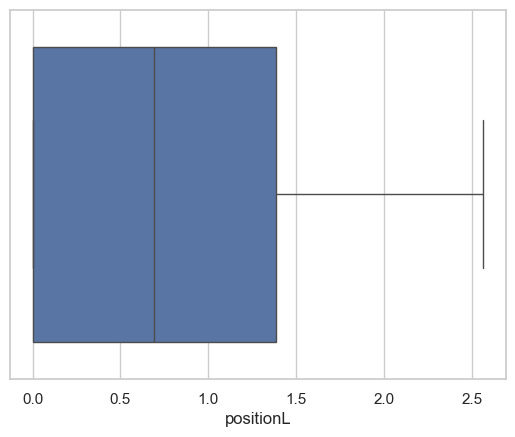

In [354]:
sns.boxplot(data=df,x=df['positionL'])
plt.show()

## Dist column ##

In [355]:
q1 = df['dist'].quantile(0.25)
q3 = df['dist'].quantile(0.75)
iqr = q3 - q1
print(f"Q1:{q1:.2f},Q3:{q3:.2f},IQR:{iqr:.2f}")

Q1:3.05,Q3:6.95,IQR:3.90


In [356]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:-2.81,Upper_fence:12.80


In [357]:
df = df[(df['dist']>lf) & (df['dist']<uf)]

In [358]:
df = df[df['dist']<7.5]

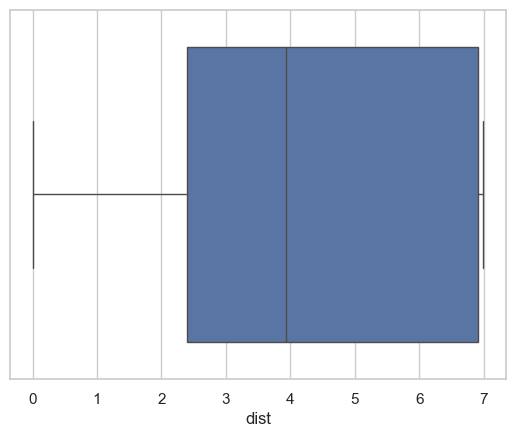

In [359]:
sns.boxplot(data=df,x=df['dist'])
plt.show()

## RPR Column ##

In [360]:
q1 = df['RPR'].quantile(0.25)
q3 = df['RPR'].quantile(0.75)
iqr = q3 - q1
print(f'Q1;{q1:.2f},Q3:{q3:.2f},IQR;{iqr:.2f}')

Q1;4.04,Q3:4.55,IQR;0.51


In [361]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:3.28,Upper_fence:5.32


In [362]:
df = df[(df['RPR']>lf) & (df['RPR']<uf)]

In [363]:
df = df[df['RPR']>3.4]

In [364]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,target
2,8,0.11,0,1.39,0.00,3.44,5.11,4.89,153.00,1.18,72.00,0,1
12,6,0.07,0,1.10,2.20,0.00,4.75,4.55,0.00,1.37,72.00,0,1


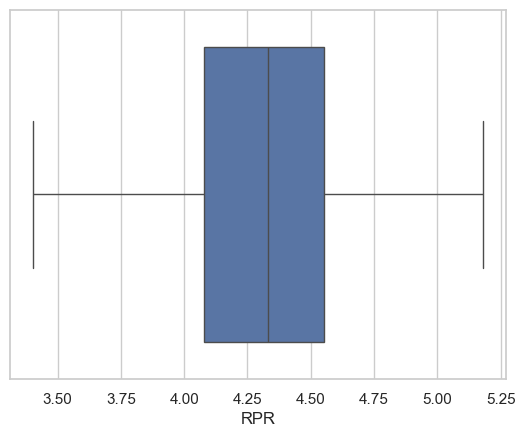

In [365]:
sns.boxplot(data=df,x=df['RPR'])
plt.show()

In [366]:
q1 = df['margin'].quantile(0.25)
q3 = df['margin'].quantile(0.75)
iqr = q3 - q1
print(f"Q1:{q1:.2f},Q3:{q3:.2f},IQR:{iqr:.2f}")

Q1:1.15,Q3:1.23,IQR:0.08


In [367]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:1.03,Upper_fence:1.34


In [368]:
df = df[(df['margin']>lf) & (df['margin']<uf)]

In [369]:
df = df[df['margin']<1.31]

In [370]:
df = df[df['margin']>1.08]

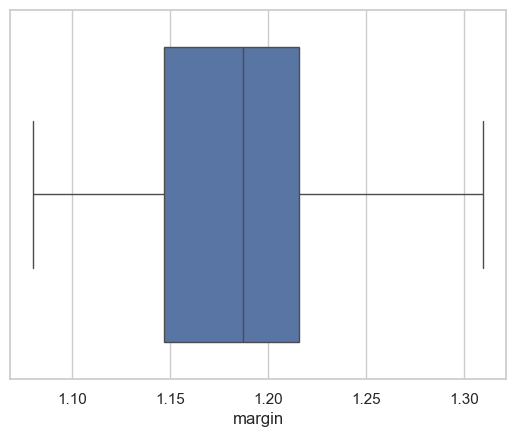

In [371]:
sns.boxplot(data=df,x=df['margin'])
plt.show()

In [372]:
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)
iqr = q3 - q1 
print(f"Q1:{q1:.2f},Q3:{q3:.2f},IQR:{iqr:.2f}")

Q1:55.00,Q3:60.00,IQR:5.00


In [373]:
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
print(f"Lower_fence:{lf:.2f},Upper_fence:{uf:.2f}")

Lower_fence:47.50,Upper_fence:67.50


In [374]:
df = df[(df['weight']>51) & (df['weight']<62)]

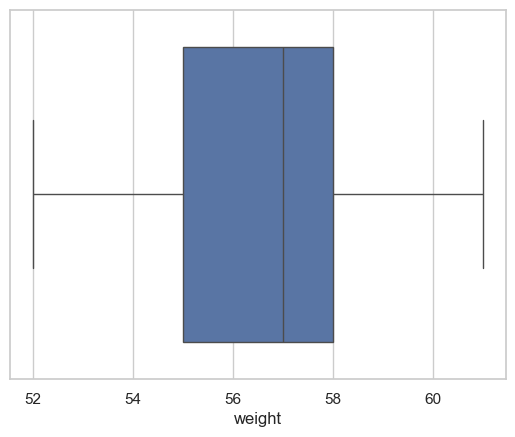

In [375]:
sns.boxplot(data=df,x=df['weight'])
plt.show()

## After removal of outliers: ##

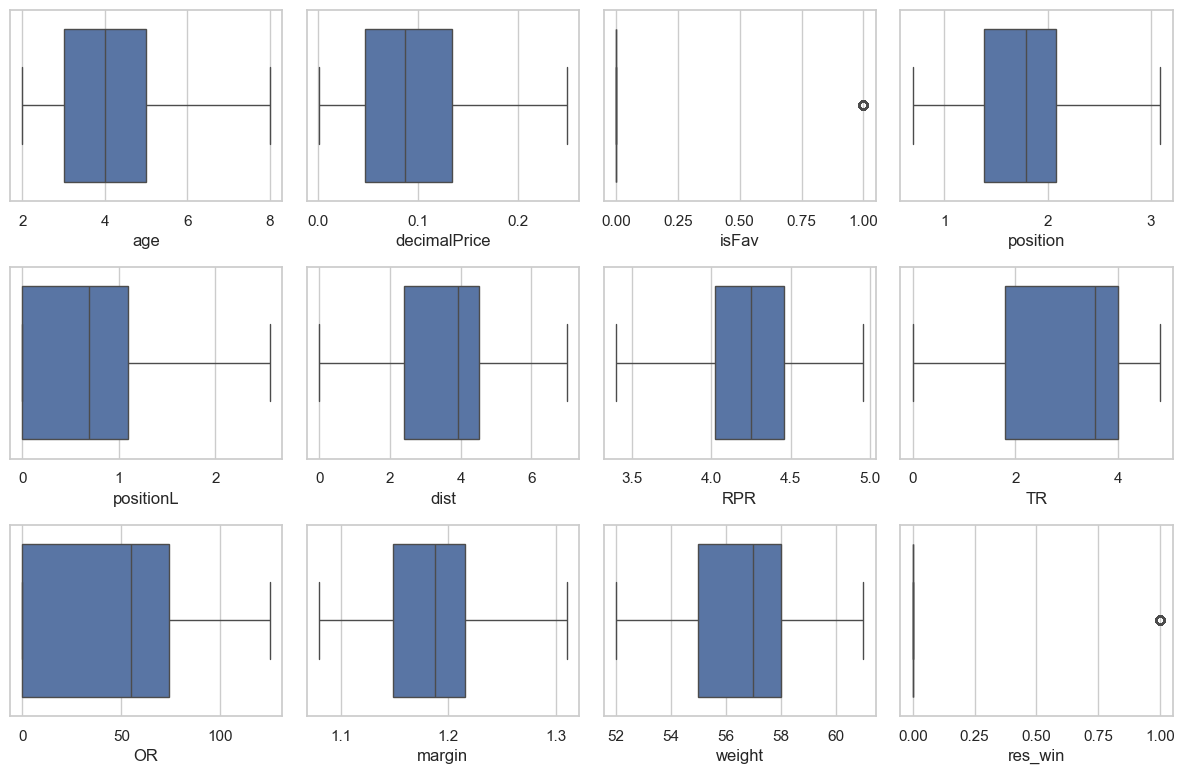

In [376]:
plt.figure(figsize=(12,10))
for i,col in enumerate(plott_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df,x=df[col])
plt.tight_layout()
plt.show()


## Distribution of target ##

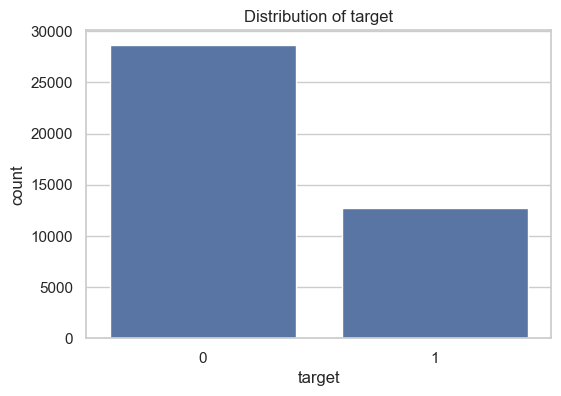

In [377]:
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=df)
plt.title('Distribution of target')
plt.show()

In [378]:
df.head(2)

,age,decimalPrice,isFav,position,positionL,dist,RPR,TR,OR,margin,weight,res_win,target
29,6,0.14,0,0.69,0.00,0.00,4.39,4.06,69.00,1.20,53.00,1,1
33,4,0.10,0,1.79,2.20,6.95,3.69,2.94,75.00,1.20,53.00,0,0


In [379]:
df.drop(columns=['positionL','isFav','res_win'],inplace=True)

In [380]:
df.drop(columns=['margin'],inplace=True)

In [381]:
df.head(2)

,age,decimalPrice,position,dist,RPR,TR,OR,weight,target
29,6,0.14,0.69,0.00,4.39,4.06,69.00,53.00,1
33,4,0.10,1.79,6.95,3.69,2.94,75.00,53.00,0


In [382]:
df['decimalPrice'] = df['decimalPrice'].apply(lambda x: round(x,2)*100)

In [383]:
df['decimalPrice'].unique()

array([14., 10.,  6.,  5., 24.,  4.,  3.,  7., 12., 22., 11., 23.,  2.,
       15., 17., 13., 18., 20.,  8.,  1., 21.,  9., 25., 19., 16.,  0.])

In [384]:
df['decimalPrice'].min()

0.0

In [385]:
df['decimalPrice'].max()

25.0

In [386]:
df['decimalPrice'] = df['decimalPrice'].apply(lambda x: max(1.0,min(x,25.0)))

In [387]:
print(df['decimalPrice'].unique().round(2).tolist())

[14.0, 10.0, 6.0, 5.0, 24.0, 4.0, 3.0, 7.0, 12.0, 22.0, 11.0, 23.0, 2.0, 15.0, 17.0, 13.0, 18.0, 20.0, 8.0, 1.0, 21.0, 9.0, 25.0, 19.0, 16.0]


In [388]:
df.head(3)

,age,decimalPrice,position,dist,RPR,TR,OR,weight,target
29,6,14.00,0.69,0.00,4.39,4.06,69.00,53.00,1
33,4,10.00,1.79,6.95,3.69,2.94,75.00,53.00,0
34,5,6.00,1.95,6.96,3.64,2.77,76.00,56.00,0


In [389]:
df['position'] = df['position'].apply(lambda x: round(x))

In [390]:
df['position'].unique().tolist()

[1, 2, 3]

In [391]:
df['dist'] = df['dist'].apply(lambda x: round(x,2))

In [392]:
print(df['dist'].unique().tolist())

[0.0, 6.95, 6.96, 3.44, 3.71, 4.11, 4.51, 6.94, 6.98, 3.43, 3.72, 4.26, 6.93, 3.93, 2.4, 3.05, 4.39, 6.99, 6.92, 6.91, 3.04, 6.97, 0.07, 4.4, 0.05]


In [393]:
df['weight'].unique().tolist()

[53.0, 56.0, 61.0, 59.0, 54.0, 57.0, 60.0, 55.0, 52.0, 58.0]

In [394]:
df['weight'].min()

52.0

In [395]:
df['weight'].max()

61.0

In [396]:
df['RPR'] = df['RPR'].apply(lambda x:round(x))

In [397]:
df['RPR'].min()

3

In [398]:
df['RPR'].max()

5

In [399]:
df['RPR'].unique()

array([4, 5, 3], dtype=int64)

In [400]:
print(df['RPR'].unique().tolist())

[4, 5, 3]


In [401]:
df['TR'] =df['TR'].apply(lambda x: round(x))

In [402]:
df['TR'].min()

0

In [403]:
df['TR'].max()

5

In [404]:
df['TR'].unique()

array([4, 3, 0, 2, 1, 5], dtype=int64)

In [405]:
print(df['TR'].unique().tolist())

[4, 3, 0, 2, 1, 5]


In [406]:
df['OR'].min()

0.0

In [407]:
df['OR'].max()

125.0

In [408]:
df['OR'] = df['OR'].apply(lambda x: round(x))

In [409]:
df['OR'].unique()

array([ 69,  75,  76,  89,  83,  82,  84,  90,  87,  80,  79,  81,  59,
        67,  61,   0,  70,  72,  64,  73,  60,  95,  86,  74,  88,  68,
        49,  51,  56,  58,  50,  48,  47,  77,  85,  78,  57,  62,  65,
       101,  92, 100,  71,  66,  63,  55,  53,  54, 102,  93,  46,  52,
        40,  91, 105, 104, 111,  98,  96, 108, 106, 113, 112, 107, 110,
       109,  45,  97,  99,  94,  23, 119,  43,  44,  39, 116, 103, 124,
        38, 115, 114, 122, 121, 117, 120, 118, 125,  42,  36, 123,  25,
        37,  35,  21,  15,  20,  34,  32,  41], dtype=int64)

In [410]:
df['OR'] = df['OR'].apply(lambda x : 1 if x >=100 else 2 if x >=50 and x<=99 else 3)

In [411]:
df['OR'].unique()

array([2, 3, 1], dtype=int64)

In [412]:
print(df['OR'].unique().tolist())

[2, 3, 1]


In [413]:
df['weight'].min()

52.0

In [414]:
df['weight'].max()

61.0

In [415]:
df['weight'].unique()

array([53., 56., 61., 59., 54., 57., 60., 55., 52., 58.])

In [416]:
df['target'].unique()

array([1, 0])

In [417]:
df.head(3)

,age,decimalPrice,position,dist,RPR,TR,OR,weight,target
29,6,14.00,1,0.00,4,4,2,53.00,1
33,4,10.00,2,6.95,4,3,2,53.00,0
34,5,6.00,2,6.96,4,3,2,56.00,0


In [418]:
lab_encoder = LabelEncoder()

In [421]:
for col in df.columns.drop(['target']):
    df[col] = lab_encoder.fit_transform(df[col])
    

In [422]:
df.head(5)

,age,decimalPrice,position,dist,RPR,TR,OR,weight,target
29,4,13,0,0,1,4,1,1,1
33,2,9,1,20,1,3,1,1,0
34,3,5,1,21,1,3,1,4,0
37,6,4,0,0,1,0,1,9,1
46,2,23,0,0,2,4,1,4,1


In [423]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

age: [4 2 3 6 5 1 0]
decimalPrice: [13  9  5  4 23  3  2  6 11 21 10 22  1 14 16 12 17 19  7  0 20  8 24 18
 15]
position: [0 1 2]
dist: [ 0 20 21  7  8 11 15 19 23  6  9 12 18 10  3  5 13 24 17 16  4 22  2 14
  1]
RPR: [1 2 0]
TR: [4 3 0 2 1 5]
OR: [1 2 0]
weight: [1 4 9 7 2 5 8 3 0 6]
target: [1 0]


## Model selection using Lazy classifier: ##

In [424]:
X = df.drop(['target'],axis=1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = LazyClassifier()

models,predictions = models.fit(x_train,x_test,y_train,y_test)
models

100%|██████████| 29/29 [00:54<00:00,  1.60s/it]

[LightGBM] [Info] Number of positive: 10206, number of negative: 22942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 33148, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307892 -> initscore=-0.809994
[LightGBM] [Info] Start training from score -0.809994


100%|██████████| 29/29 [00:54<00:00,  1.88s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.96,0.96,0.96,0.96,0.07
RidgeClassifierCV,0.96,0.96,0.96,0.96,0.08
RidgeClassifier,0.96,0.96,0.96,0.96,0.10
SVC,0.96,0.96,0.96,0.96,8.22
LinearDiscriminantAnalysis,0.96,0.96,0.96,0.96,0.08
LinearSVC,0.96,0.96,0.96,0.96,0.52
CalibratedClassifierCV,0.96,0.96,0.96,0.96,0.29
LGBMClassifier,0.96,0.96,0.96,0.96,0.32
QuadraticDiscriminantAnalysis,0.96,0.96,0.96,0.96,0.09


## Imbalanced data: ##

In [425]:
y_train.value_counts()

target
0    22942
1    10206
Name: count, dtype: int64

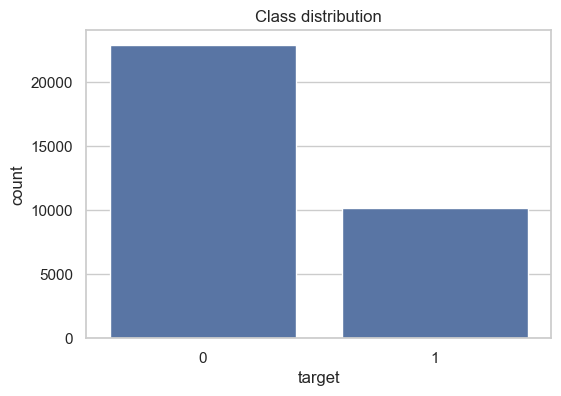

In [426]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train,data=df)
plt.title('Class distribution')
plt.show()

In [427]:
y_train.value_counts(normalize=True)

target
0   0.69
1   0.31
Name: proportion, dtype: float64

In [178]:
#ss = StandardScaler()

In [179]:
#for col in df.columns.drop(['target']):
 #   df[col] = ss.fit_transform(df[[col]])

In [428]:
df.head(2)

,age,decimalPrice,position,dist,RPR,TR,OR,weight,target
29,4,13,0,0,1,4,1,1,1
33,2,9,1,20,1,3,1,1,0


In [429]:
X = df.drop(['target'],axis=1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train_accuracy_score : {accuracy_score(y_train,train_pred)}")
print(f"Train_precison_score : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_recall_score : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1_score : {f1_score(y_train,train_pred,average='weighted')}")
print()
print(f"Test_Accuracy_score : {accuracy_score(y_test,test_pred)}")
print(f"Test_precision_score : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_recall_score : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_f1_score : {f1_score(y_test,test_pred,average='weighted')}")
print()
print(classification_report(y_test,test_pred))

Train_accuracy_score : 0.9599674188487993
Train_precison_score : 0.961001773415813
Train_recall_score : 0.9599674188487993
Train_F1_score : 0.9602278548053698

Test_Accuracy_score : 0.9581322393822393
Test_precision_score : 0.9592639034179034
Test_recall_score : 0.9581322393822393
Test_f1_score : 0.9584260942910099

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5784
           1       0.91      0.96      0.93      2504

    accuracy                           0.96      8288
   macro avg       0.95      0.96      0.95      8288
weighted avg       0.96      0.96      0.96      8288



In [430]:
X = df.drop(['target'],axis=1)
y = df['target']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train_accuracy_score : {accuracy_score(y_train,train_pred)}")
print(f"Train_precison_score : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_recall_score : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1_score : {f1_score(y_train,train_pred,average='weighted')}")
print()
print(f"Test_Accuracy_score : {accuracy_score(y_test,test_pred)}")
print(f"Test_precision_score : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_recall_score : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_f1_score : {f1_score(y_test,test_pred,average='weighted')}")
print()
print(classification_report(y_test,test_pred))

Train_accuracy_score : 0.9647746098177696
Train_precison_score : 0.9649989843211015
Train_recall_score : 0.9647746098177696
Train_F1_score : 0.9647712319095646

Test_Accuracy_score : 0.9669572798605056
Test_precision_score : 0.9670971315712802
Test_recall_score : 0.9669572798605056
Test_f1_score : 0.9669521795129047

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5685
           1       0.96      0.98      0.97      5785

    accuracy                           0.97     11470
   macro avg       0.97      0.97      0.97     11470
weighted avg       0.97      0.97      0.97     11470



## Balanced data: ##

In [431]:
y_train.value_counts()

target
0    22988
1    22888
Name: count, dtype: int64

In [432]:
y_train.value_counts(normalize=True)

target
0   0.50
1   0.50
Name: proportion, dtype: float64

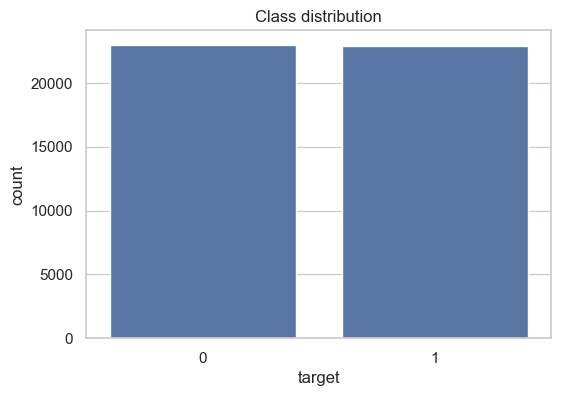

In [433]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train,data=df)
plt.title('Class distribution')
plt.show()

### Balanced data obtained afte having applied the Random Over Sampler method. ###

In [434]:
X = df.drop(['target'],axis=1)
y = df['target']

ros = SMOTE()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train_accuracy_score : {accuracy_score(y_train,train_pred)}")
print(f"Train_precison_score : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_recall_score : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1_score : {f1_score(y_train,train_pred,average='weighted')}")
print()
print(f"Test_Accuracy_score : {accuracy_score(y_test,test_pred)}")
print(f"Test_precision_score : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_recall_score : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_f1_score : {f1_score(y_test,test_pred,average='weighted')}")
print()
print(classification_report(y_test,test_pred))

Train_accuracy_score : 0.9683058679919784
Train_precison_score : 0.9687276000412811
Train_recall_score : 0.9683058679919784
Train_F1_score : 0.9683000612385342

Test_Accuracy_score : 0.9701830863121186
Test_precision_score : 0.9704717971009136
Test_recall_score : 0.9701830863121186
Test_f1_score : 0.9701743350578849

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5673
           1       0.96      0.98      0.97      5797

    accuracy                           0.97     11470
   macro avg       0.97      0.97      0.97     11470
weighted avg       0.97      0.97      0.97     11470



## Balanced data: ##

In [435]:
y_train.value_counts()

target
0    23000
1    22876
Name: count, dtype: int64

## Model selection ##

In [436]:
X= df.drop(['target'],axis=1)
y = df['target']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

models = [LogisticRegression(),AdaBoostClassifier(),RandomForestClassifier(),SVC(),DecisionTreeClassifier()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)


    print(f"**************{model}*****************")
    print(f"Train_accuracy_score : {accuracy_score(y_train,train_pred)}")
    print(f"Train_precison_score : {precision_score(y_train,train_pred,average='weighted')}")
    print(f"Train_recall_score : {recall_score(y_train,train_pred,average='weighted')}")
    print(f"Train_F1_score : {f1_score(y_train,train_pred,average='weighted')}")
    print()
    print(f"Test_Accuracy_score : {accuracy_score(y_test,test_pred)}")
    print(f"Test_precision_score : {precision_score(y_test,test_pred,average='weighted')}")
    print(f"Test_recall_score : {recall_score(y_test,test_pred,average='weighted')}")
    print(f"Test_f1_score : {f1_score(y_test,test_pred,average='weighted')}")
    print()
    print(classification_report(y_test,test_pred))



**************LogisticRegression()*****************
Train_accuracy_score : 0.9650579823873049
Train_precison_score : 0.9652659873446593
Train_recall_score : 0.9650579823873049
Train_F1_score : 0.9650540765971201

Test_Accuracy_score : 0.963382737576286
Test_precision_score : 0.9635351718152841
Test_recall_score : 0.963382737576286
Test_f1_score : 0.9633797269183043

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5735
           1       0.96      0.97      0.96      5735

    accuracy                           0.96     11470
   macro avg       0.96      0.96      0.96     11470
weighted avg       0.96      0.96      0.96     11470

**************AdaBoostClassifier()*****************
Train_accuracy_score : 0.9636193216496644
Train_precison_score : 0.9637380334107164
Train_recall_score : 0.9636193216496644
Train_F1_score : 0.9636169932387436

Test_Accuracy_score : 0.9620749782040104
Test_precision_score : 0.9621626746929447
Test_rec

In [437]:
X= df.drop(['target'],axis=1)
y = df['target']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = SVC()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


print(f"**************{model}*****************")
print(f"Train_accuracy_score : {accuracy_score(y_train,train_pred)}")
print(f"Train_precison_score : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_recall_score : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1_score : {f1_score(y_train,train_pred,average='weighted')}")
print()
print(f"Test_Accuracy_score : {accuracy_score(y_test,test_pred)}")
print(f"Test_precision_score : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_recall_score : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_f1_score : {f1_score(y_test,test_pred,average='weighted')}")
print()
print(classification_report(y_test,test_pred))



**************SVC()*****************
Train_accuracy_score : 0.9669326009242305
Train_precison_score : 0.9673714691045079
Train_recall_score : 0.9669326009242305
Train_F1_score : 0.9669247678137592

Test_Accuracy_score : 0.9654751525719267
Test_precision_score : 0.9661248285551004
Test_recall_score : 0.9654751525719267
Test_f1_score : 0.9654634676750913

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5738
           1       0.95      0.98      0.97      5732

    accuracy                           0.97     11470
   macro avg       0.97      0.97      0.97     11470
weighted avg       0.97      0.97      0.97     11470



In [438]:
X= df.drop(['target'],axis=1)
y = df['target']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = AdaBoostClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


print(f"**************{model}*****************")
print(f"Train_accuracy_score : {accuracy_score(y_train,train_pred)}")
print(f"Train_precison_score : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_recall_score : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1_score : {f1_score(y_train,train_pred,average='weighted')}")
print()
print(f"Test_Accuracy_score : {accuracy_score(y_test,test_pred)}")
print(f"Test_precision_score : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_recall_score : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_f1_score : {f1_score(y_test,test_pred,average='weighted')}")
print()
print(classification_report(y_test,test_pred))



**************AdaBoostClassifier()*****************
Train_accuracy_score : 0.9639244921091639
Train_precison_score : 0.9640605541031605
Train_recall_score : 0.9639244921091639
Train_F1_score : 0.9639217636165148

Test_Accuracy_score : 0.9657367044463818
Test_precision_score : 0.9659380509698078
Test_recall_score : 0.9657367044463818
Test_f1_score : 0.9657333880164084

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5741
           1       0.96      0.98      0.97      5729

    accuracy                           0.97     11470
   macro avg       0.97      0.97      0.97     11470
weighted avg       0.97      0.97      0.97     11470



## Saving the Model ##

In [439]:
with open("model_1.pkl","wb") as file:
    pickle.dump(model,file)

## Loading the Model ##

In [440]:
with open("model_1.pkl","rb") as file:
    mdl_1 = pickle.load(file)

In [441]:
train_pred = mdl_1.predict(x_train)
test_pred = mdl_1.predict(x_test)


print(f"**************{model}*****************")
print(f"Train_accuracy_score : {accuracy_score(y_train,train_pred)}")
print(f"Train_precison_score : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train_recall_score : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train_F1_score : {f1_score(y_train,train_pred,average='weighted')}")
print()
print(f"Test_Accuracy_score : {accuracy_score(y_test,test_pred)}")
print(f"Test_precision_score : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test_recall_score : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test_f1_score : {f1_score(y_test,test_pred,average='weighted')}")
print()
print(classification_report(y_test,test_pred))


**************AdaBoostClassifier()*****************
Train_accuracy_score : 0.9639244921091639
Train_precison_score : 0.9640605541031605
Train_recall_score : 0.9639244921091639
Train_F1_score : 0.9639217636165148

Test_Accuracy_score : 0.9657367044463818
Test_precision_score : 0.9659380509698078
Test_recall_score : 0.9657367044463818
Test_f1_score : 0.9657333880164084

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5741
           1       0.96      0.98      0.97      5729

    accuracy                           0.97     11470
   macro avg       0.97      0.97      0.97     11470
weighted avg       0.97      0.97      0.97     11470



In [442]:
df = df.reset_index(drop=True)

In [443]:
df.index

RangeIndex(start=0, stop=41436, step=1)

In [444]:
df.sample(5)

,age,decimalPrice,position,dist,RPR,TR,OR,weight,target
32142,3,10,0,6,1,4,1,7,0
6154,1,21,0,0,1,4,2,5,1
36018,1,12,0,0,1,4,1,1,1
9458,3,20,0,0,2,0,2,2,1
14946,1,0,1,20,1,3,2,6,0


In [445]:
X

,age,decimalPrice,position,dist,RPR,TR,OR,weight
0,4,13,0,0,1,4,1,1
1,2,9,1,20,1,3,1,1
2,3,5,1,21,1,3,1,4
3,6,4,0,0,1,0,1,9
4,2,23,0,0,2,4,1,4
...,...,...,...,...,...,...,...,...
57341,1,10,0,0,1,4,1,8
57342,2,14,0,0,2,4,0,5
57343,4,12,0,0,2,4,1,2
57344,1,5,0,5,1,3,1,5


In [446]:
df.iloc[5]

age             5
decimalPrice    9
position        0
dist            7
RPR             1
TR              4
OR              1
weight          7
target          1
Name: 5, dtype: int64

In [447]:
input_data = df.iloc[5].drop('target').to_numpy()
prediction = mdl_1.predict([input_data])
print(f"Race_outcome : {prediction[0]}")

Race_outcome : 1


In [448]:
def race_pred(input_data):
    input_data_array = np.array(input_data)
    race_prediction = mdl_1.predict([input_data_array])
    return 'win/placed' if race_prediction[0] == 1 else 'not_won/not_placed'

In [449]:
race_pred(input_data)

'win/placed'

In [450]:
def race_pred_new(user_data):
    input_data = df.iloc[user_data].drop('target').to_numpy()
    prediction = mdl_1.predict([input_data])  
    return 'win/placed' if prediction[0] == 1 else 'not_won/not_placed'

In [451]:
race_pred_new(int(input()))

'win/placed'

In [452]:
df.iloc[5]

age             5
decimalPrice    9
position        0
dist            7
RPR             1
TR              4
OR              1
weight          7
target          1
Name: 5, dtype: int64

In [454]:
age_list = df['age'].unique().tolist()
age_list

[4, 2, 3, 6, 5, 1, 0]

In [455]:
decimal_price_list  = df['decimalPrice'].unique().tolist()
print(decimal_price_list)

[13, 9, 5, 4, 23, 3, 2, 6, 11, 21, 10, 22, 1, 14, 16, 12, 17, 19, 7, 0, 20, 8, 24, 18, 15]


In [456]:
dist_list = df['dist'].unique().tolist()
print(dist_list)

[0, 20, 21, 7, 8, 11, 15, 19, 23, 6, 9, 12, 18, 10, 3, 5, 13, 24, 17, 16, 4, 22, 2, 14, 1]


In [457]:
position_list = df['position'].unique().tolist()
position_list

[0, 1, 2]

In [458]:
weight_list = df['weight'].unique().tolist()
weight_list

[1, 4, 9, 7, 2, 5, 8, 3, 0, 6]

In [459]:
rpr_list = df['RPR'].unique().tolist()
rpr_list

[1, 2, 0]

In [460]:
tr_list = df['TR'].unique().tolist()
tr_list

[4, 3, 0, 2, 1, 5]

In [461]:
or_list = df['OR'].unique().tolist()
or_list

[1, 2, 0]